In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from PIL import Image
%matplotlib inline

# read base image

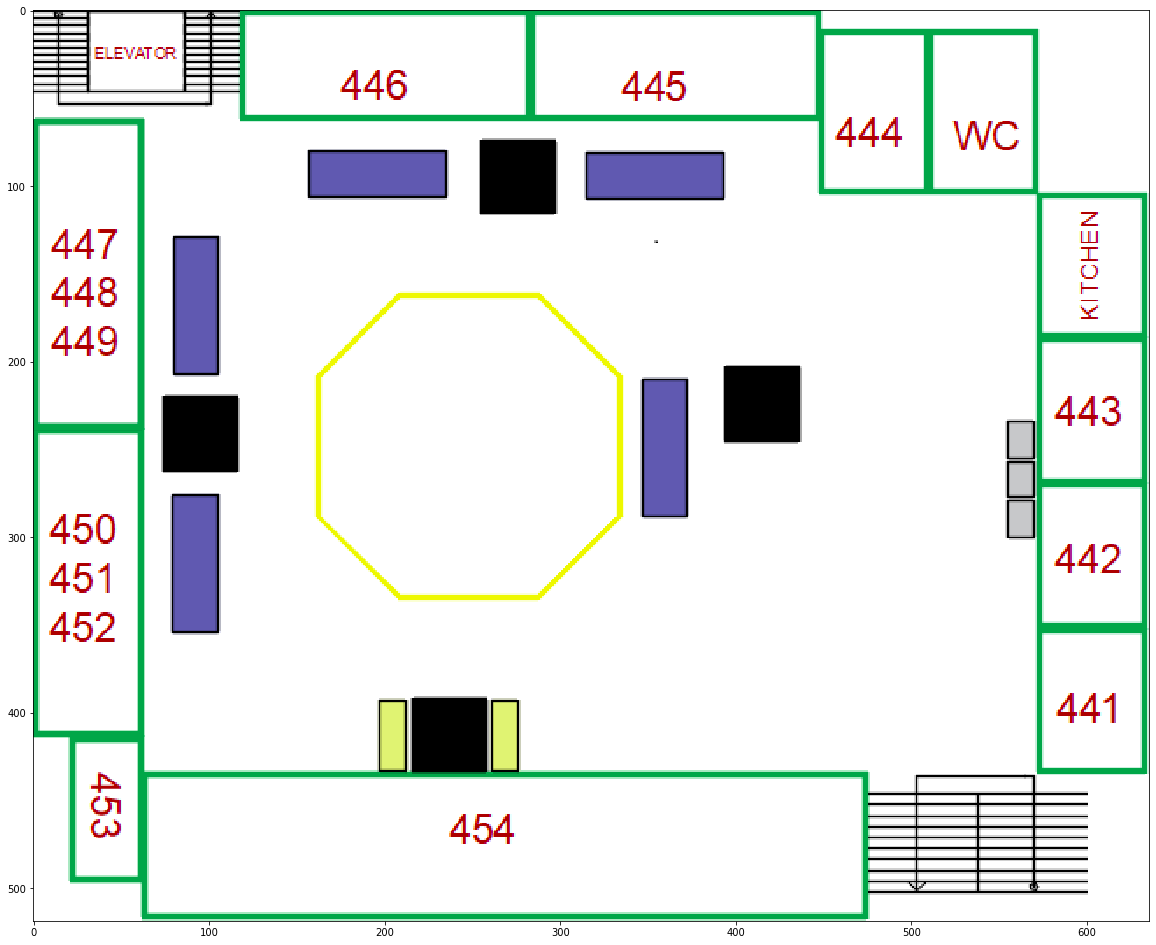

In [40]:
#image_filename = 'real_time_locations.png'
image_filename = 'floor_plan.png'
im = plt.imread(image_filename)
plt.figure(figsize=(20,20))
plt.imshow(im)

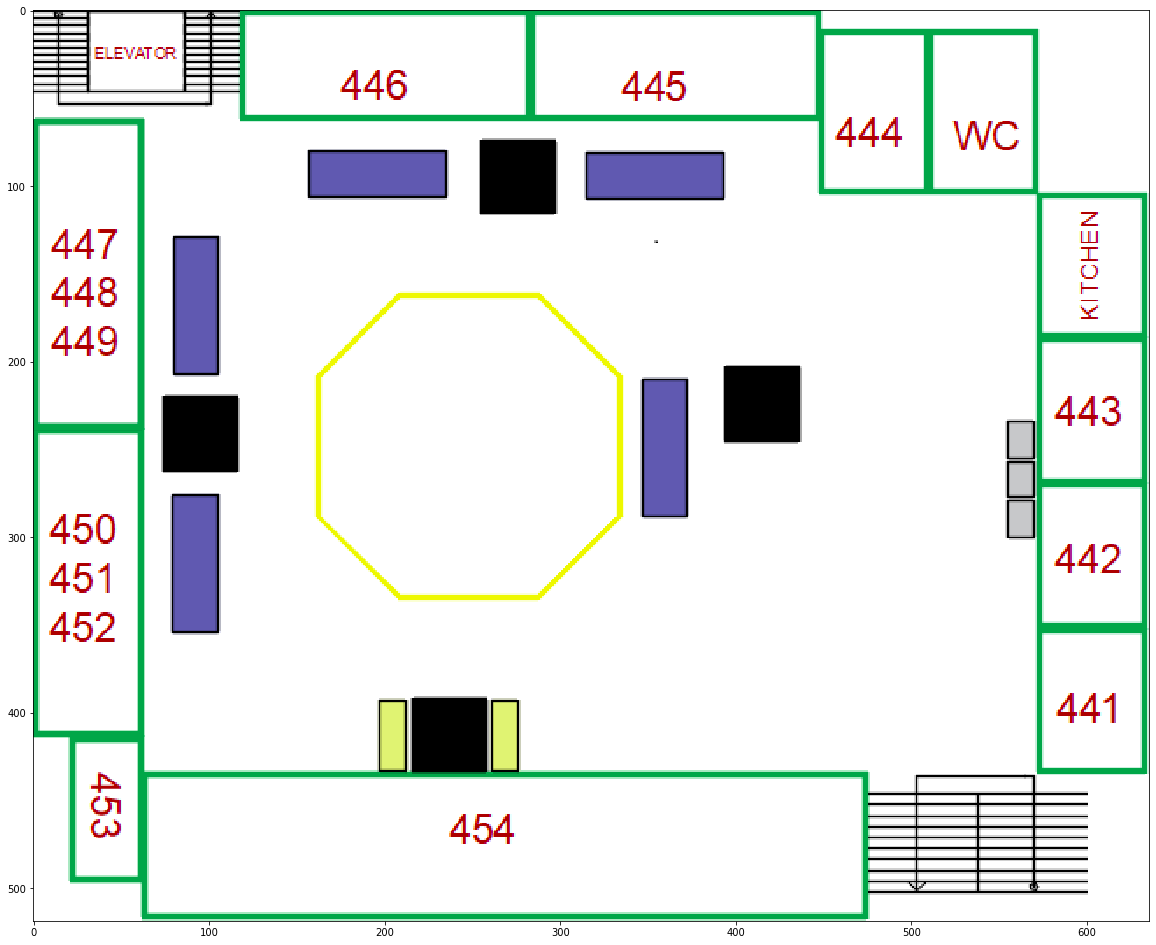

In [41]:
im = (im*255).astype('uint8')
plt.figure(figsize=(20,20))
plt.imshow(im)

# create locations array

In [42]:
df1 = pd.read_csv('locs1.csv').to_numpy()
df2 = pd.read_csv('locs2.csv').to_numpy()

In [43]:
locs = np.zeros((451,762))
for x,y in df1:
    locs[x][y] += 1
for x,y in df2:
    locs[x][y] += 1

# create color map

In [44]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
colors = ["white", "yellow", "red"]
cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)

# heatmap #1

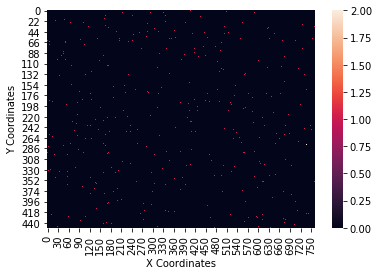

In [45]:
# Heatmap tutorial
# https://likegeeks.com/seaborn-heatmap-tutorial/
heatmap = sb.heatmap(locs)
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.show()

In [46]:
from scipy.ndimage.filters import gaussian_filter

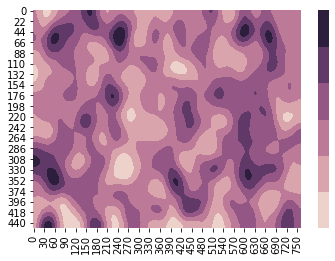

In [47]:
df3_smooth = gaussian_filter(locs, sigma=20)
cmap123 = sb.cubehelix_palette()
sb.heatmap(df3_smooth, vmin=np.min(df3_smooth), vmax=np.max(df3_smooth), cmap = cmap123 , cbar=True , cbar_kws={"ticks":[-40,150,-20,0,25,50,75,100,125]}) 

# heatmap #2

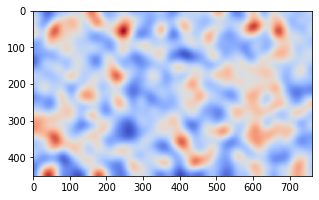

In [48]:
from astropy.convolution import convolve
from astropy.convolution.kernels import Gaussian1DKernel, Gaussian2DKernel
#plt.clf()
plt.figure(figsize=(5,5))

#hm = convolve(locs, Gaussian2DKernel(x_stddev=15))
hm = gaussian_filter(locs, sigma=16)
#plt.subplot(2,2,2)
plt.imshow(hm, cmap='coolwarm', interpolation='none')
#plt.colorbar()
#plt.title('Heatmap')
#plt.xlabel("X")
#plt.ylabel("Y")
#plt.gca().invert_xaxis()
plt.savefig("asdas.png")
plt.show()

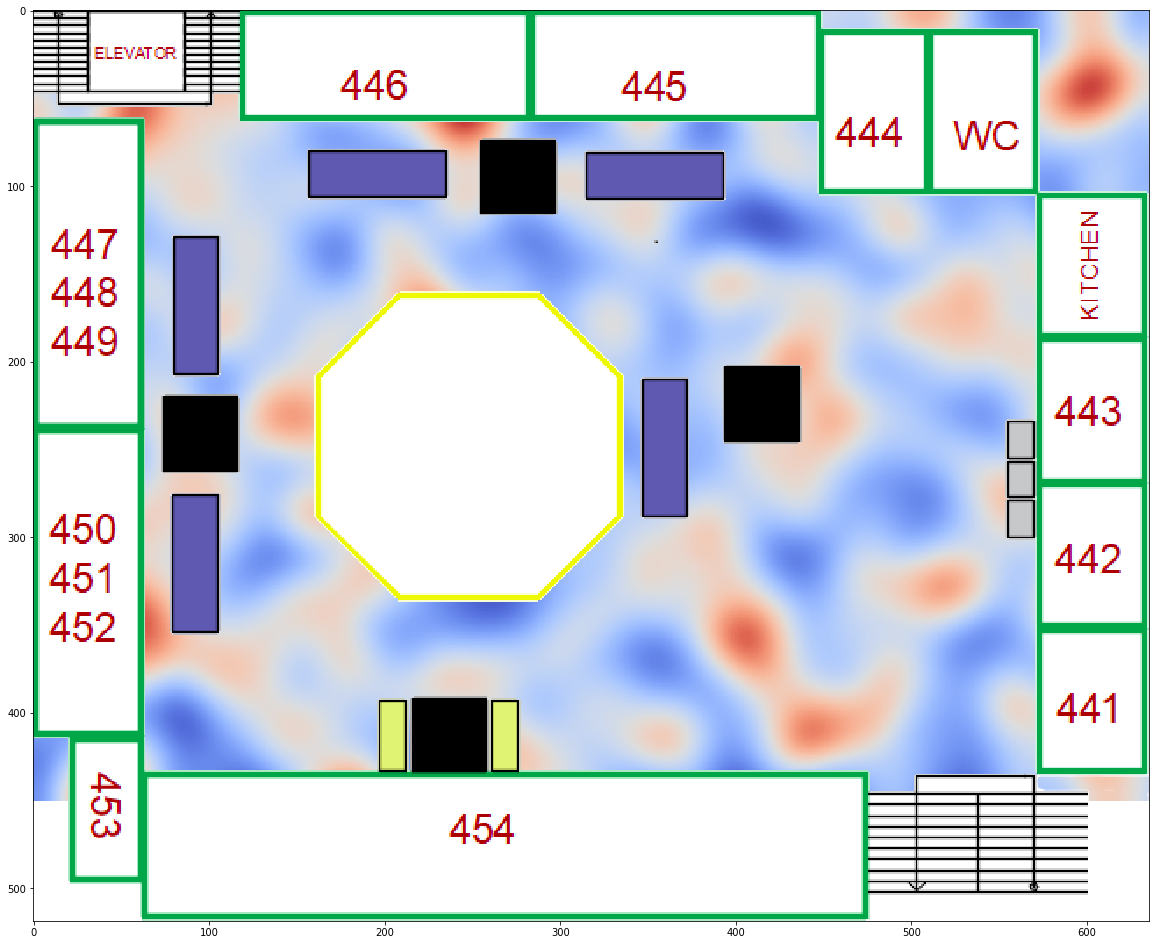

In [49]:
plt.figure(figsize=(20,20))
plt.imshow(255 * hm, alpha=5, cmap='coolwarm')
plt.imshow(im)
plt.axis('on')
plt.savefig('heatmap.png')
plt.show()

# heatmap #3

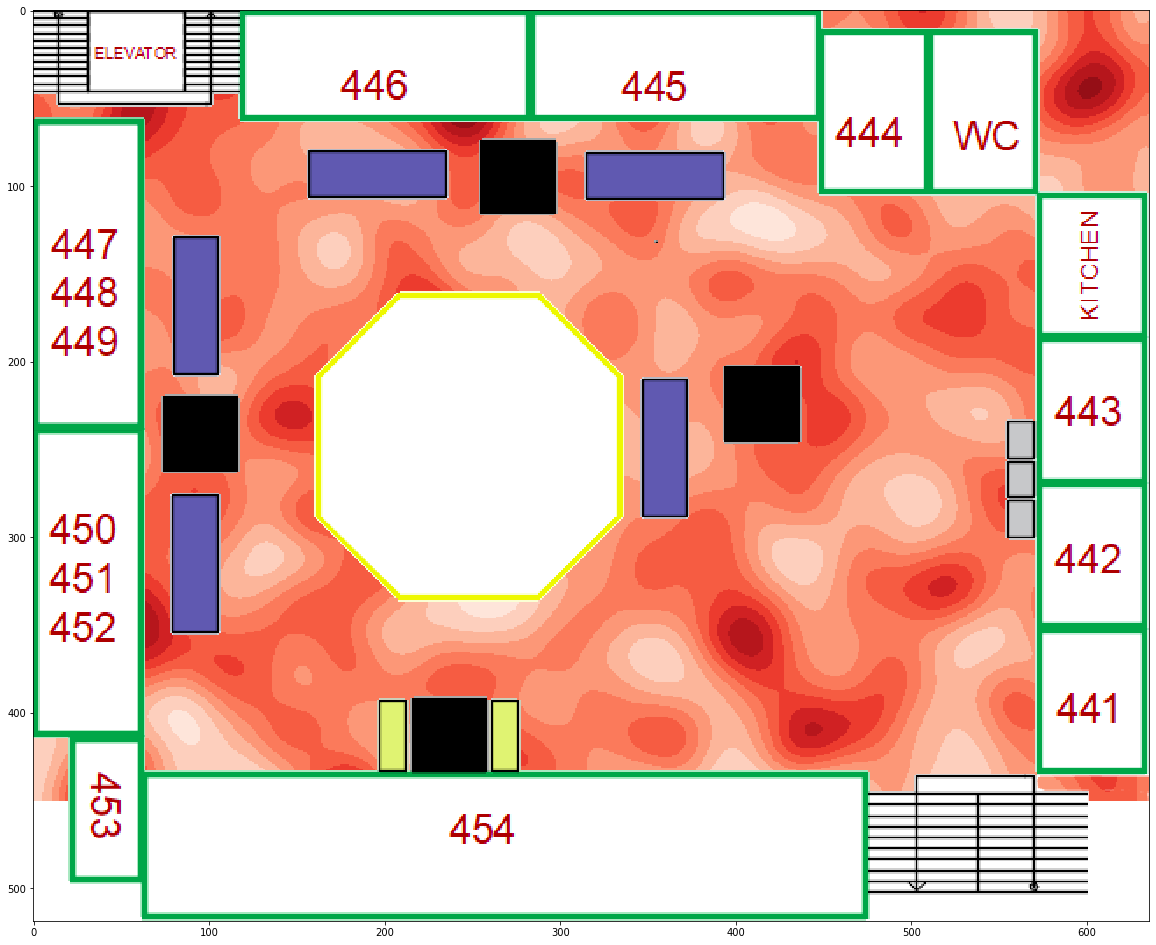

In [50]:
import numpy as np
cmap123 = sb.cubehelix_palette(rot=5, n_colors=8)
cmap123 = sb.color_palette(palette="Reds", n_colors=10)
cmap123 = ListedColormap(np.array(cmap123))

plt.figure(figsize=(20,20))
plt.imshow(255 * hm, alpha=5, cmap=cmap123)
plt.imshow(im)
plt.axis('on')
plt.savefig('heatmap.png')
plt.show()